In [1]:
%matplotlib inline

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [40]:
df = pd.read_excel('../../static/excel_data/monthly_price.xlsx',sheet_name=1,header=1)

In [44]:
df = df[1:]
df.head()

,구분,전국,서울,강북,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,양산,거제,진주,김해,통영,제주도,제주/ 서귀포,기타지방
2,1986-02-01 00:00:00,0,0.17331,-0.163934,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-03-01 00:00:00,-0.184162,-0.17301,-0.164204,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-04-01 00:00:00,-0.553506,-0.693241,-0.657895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1986-05-01 00:00:00,-0.742115,-0.52356,-1.3245,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986-06-01 00:00:00,-0.560748,-1.05263,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df[u'구분'] =  pd.to_datetime(df[u'구분'], format='%Y-%mm-%dd')

In [20]:
df.head()

,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Kimhae,Tongyoung,Jeju-do,Jeju/ Seogwipo,Non-Metropolitan Area
0,1986-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-02-01,0.000000,0.173310,-0.163934,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-03-01,-0.184162,-0.173010,-0.164204,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-04-01,-0.553506,-0.693241,-0.657895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-05-01,-0.742115,-0.523560,-1.324503,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_2017 = df[(df[u'구분'] >= '2017-01-01') & (df[u'구분'] <= '2017-12-01')]
df_2017.head()

,구분,전국,서울,강북,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,양산,거제,진주,김해,통영,제주도,제주/ 서귀포,기타지방
373,2017-01-01,0.0202254,0.0281325,0.0957794,0.149191,0.0332524,0.20764,0.0902261,0.0453527,0.108483,...,-0.235083,-0.0864653,0.0945267,-1.15354,0.194862,0.000136621,-0.456691,NaN,0.34912,-0.0995726
374,2017-02-01,0.00399383,0.0383649,0.0673399,0.0697029,-0.0474536,0.149288,0.0642806,0.100071,0.104471,...,-0.197559,-0.306795,0.0220546,-0.315595,0.310448,-0.219693,0,NaN,0.0752502,-0.0780777
375,2017-03-01,0.0177884,0.10001,0.0805978,0.0362663,0.0175275,0.170133,0.0475966,0.0660497,0.0359865,...,-0.153116,-0.117507,0.0369806,-0.428391,0.0338722,-0.183478,-0.361368,NaN,0.103194,-0.089424
376,2017-04-01,0.0339108,0.137535,0.118257,0.0819053,0.0534122,0.149069,0.143204,0.0356364,0.198521,...,-0.0766568,-0.147984,-0.142587,-0.319881,0.141781,-0.0883498,-0.0372385,NaN,-0.00212783,-0.0628669
377,2017-05-01,0.0484842,0.219778,0.150335,0.0873755,0.230375,0.158659,0.128675,0.175572,0.232482,...,-0.208356,-0.470095,-0.044074,-0.679933,0.15511,-0.135804,-0.452471,NaN,-0.0595576,-0.0732917


In [50]:
y_columns = list(df_2017.columns.values)

In [51]:
y_columns.remove(u'구분')

In [60]:
plt.font_manager.get_fontconfig_fonts()

AttributeError: 'module' object has no attribute 'font_manager'

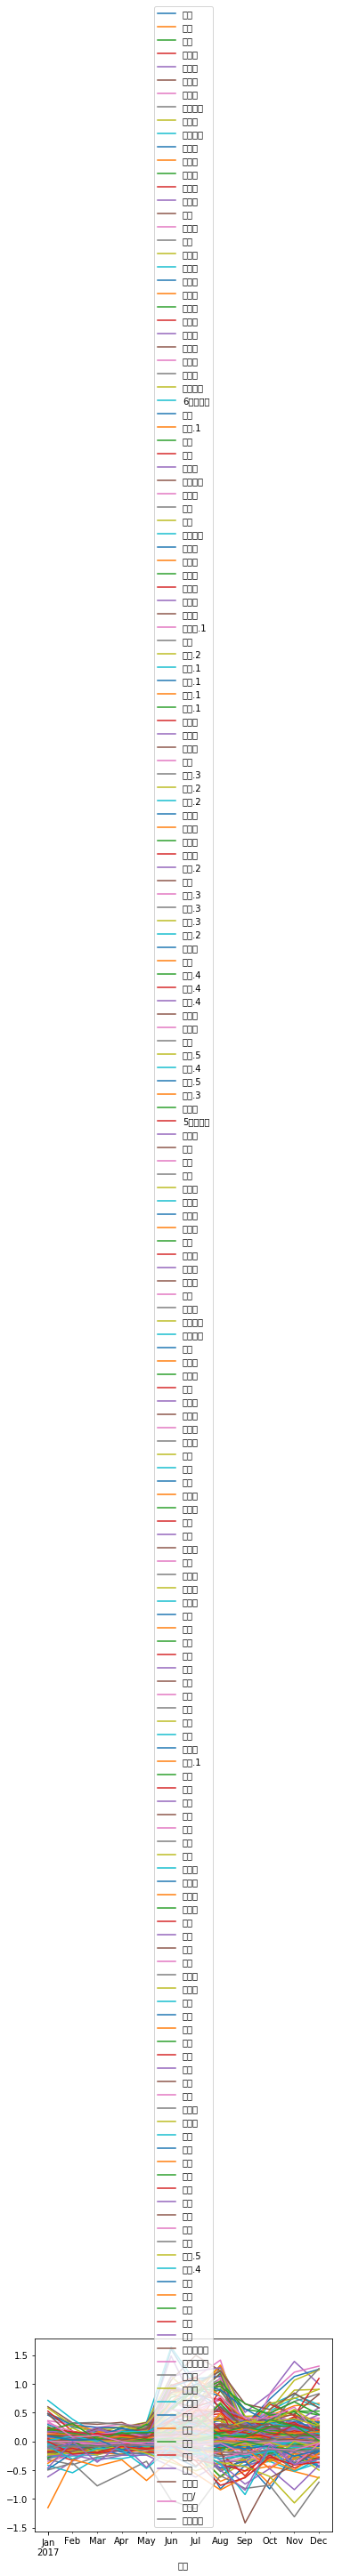

In [58]:

df_2017.plot(x=u'구분',y=y_columns)